## **Analyse des données récupérées**

#### Membres du binôme :
- KRISNI Almehdi
- ARICHANDRA Santhos

In [120]:
# Imports
from utils import *

# Rechargement automatique des fichiers importés (vu dans l'UE de Data Science en L3)
%load_ext autoreload
%autoreload 2

# On désactive les affichages
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataframe creation and management

In [49]:
# We create the dataframe containing all the recipes collected and clear the NaN values in case
df = recipeDfMaker(10000, 100, 25000)
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13494 entries, 0 to 13495
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           13494 non-null  object 
 1   id             13494 non-null  int64  
 2   description    13494 non-null  object 
 3   picture        13494 non-null  object 
 4   servings       13494 non-null  int64  
 5   calories       13494 non-null  float64
 6   reviews        13494 non-null  int64  
 7   rating         13494 non-null  float64
 8   carbohydrates  13494 non-null  float64
 9   dietary fiber  13494 non-null  float64
 10  sugars         13494 non-null  float64
 11  fat            13494 non-null  float64
 12  saturated fat  13494 non-null  float64
 13  cholesterol    13494 non-null  float64
 14  calcium        13494 non-null  float64
 15  iron           13494 non-null  float64
 16  magnesium      13494 non-null  float64
 17  potassium      13494 non-null  float64
 18  sodium

In [50]:
# We fuse the picture data to the dataframe
picdf = pictureDataDfMaker(10000, 100, 25000)
picdf.dropna()
fuseDfPictureData(df, picdf)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13494 entries, 0 to 13495
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  13494 non-null  object 
 1   id                    13494 non-null  int64  
 2   description           13494 non-null  object 
 3   picture               13494 non-null  object 
 4   servings              13494 non-null  int64  
 5   calories              13494 non-null  float64
 6   reviews               13494 non-null  int64  
 7   rating                13494 non-null  float64
 8   carbohydrates         13494 non-null  float64
 9   dietary fiber         13494 non-null  float64
 10  sugars                13494 non-null  float64
 11  fat                   13494 non-null  float64
 12  saturated fat         13494 non-null  float64
 13  cholesterol           13494 non-null  float64
 14  calcium               13494 non-null  float64
 15  iron               

In [51]:
# We remove the pictures
picdf = removeNoPictures(df)
picdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12594 entries, 0 to 13495
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  12594 non-null  object 
 1   id                    12594 non-null  int64  
 2   description           12594 non-null  object 
 3   picture               12594 non-null  object 
 4   servings              12594 non-null  int64  
 5   calories              12594 non-null  float64
 6   reviews               12594 non-null  int64  
 7   rating                12594 non-null  float64
 8   carbohydrates         12594 non-null  float64
 9   dietary fiber         12594 non-null  float64
 10  sugars                12594 non-null  float64
 11  fat                   12594 non-null  float64
 12  saturated fat         12594 non-null  float64
 13  cholesterol           12594 non-null  float64
 14  calcium               12594 non-null  float64
 15  iron               

## Vizualisation

In [52]:
# We compute the FSA scores
computeFSAscore(df)

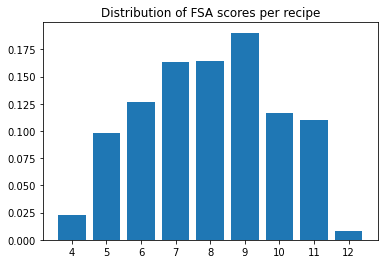

In [53]:
# We plot a histogram of the FSA score distribution
showBar(df["FSA_score"].tolist(), odds=True, title="Distribution of FSA scores per recipe")

In [54]:
# We compute the number of ingredients per recipe
computeNumberIngredients(df)

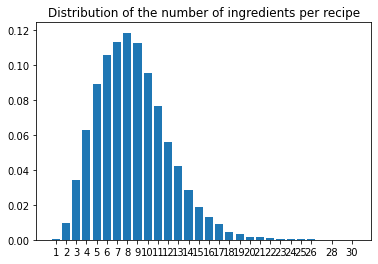

In [55]:
# We plot a histogram of the number of ingredients distribution
showBar(df["number_ingredients"].tolist(), odds=True, title="Distribution of the number of ingredients per recipe")

In [69]:
# We find the mean cosine similarities for a sample size of 1000 recipes
l2, l4, l6, l8 = computeSimilarityOdds(df.sample(int(1000)))

In [70]:
# We print the results only for the sample size = 1000. 
# It takes approximately 30 minutes to compute the values for 1000 recipes and 2 hours for 2000 exemples. 
# We have copied the results into a list below in order to keep them safe.
print(np.mean(l2), np.mean(l4), np.mean(l6), np.mean(l8))

0.8068768768768768 0.5258798798798798 0.01865065065065065 0.0002122122122122122


In [71]:
# We find the mean cosine similarities for a sample size of 2000 recipes
l22, l42, l62, l82 = computeSimilarityOdds(df.sample(int(2000)))

In [72]:
# We print the results only for the sample size = 2000
print(np.mean(l22), np.mean(l42), np.mean(l62), np.mean(l82))

0.8045832916458229 0.5420570285142571 0.019801900950475237 0.0002196098049024512


In [95]:
# Similarities
xlabels = [0, 1000, 2000, 3000, 4000, 5000]
cos2values = [0, 0.806, 0.804, 0.809, 0.798, 0.799]
cos4values = [0, 0.525, 0.542, 0.537, 0.534, 0.535]
cos6values = [0, 0.019, 0.020, 0.019, 0.019, 0.018]
cos8values = [0, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002]

sizecos2values = [0] + [int(cos2values[i] * (i * 1000)) for i in range(1, len(xlabels))]
sizecos4values = [0] + [int(cos4values[i] * (i * 1000)) for i in range(1, len(xlabels))]
sizecos6values = [0] + [int(cos6values[i] * (i * 1000)) for i in range(1, len(xlabels))]
sizecos8values = [0] + [int(cos8values[i] * (i * 1000)) for i in range(1, len(xlabels))]

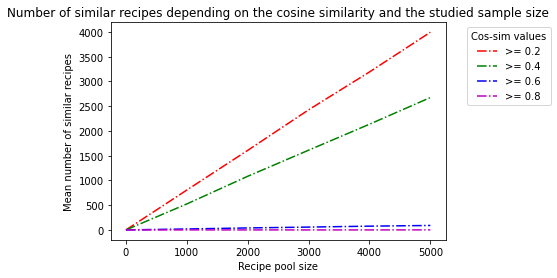

In [139]:
# Ploting the evolution of the number of similar recipes based on the size of the sample and the shared cosine similarity
plt.title("Number of similar recipes depending on the cosine similarity and the studied sample size")
plt.plot(xlabels, sizecos2values, "r-.", label=">= 0.2")
plt.plot(xlabels, sizecos4values, "g-.", label=">= 0.4")
plt.plot(xlabels, sizecos6values, "b-.", label=">= 0.6")
plt.plot(xlabels, sizecos8values, "m-.", label=">= 0.8")
plt.xlabel("Recipe pool size")
plt.ylabel("Mean number of similar recipes")
plt.legend(title="Cos-sim values", bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## A selection of recipe pairs

## Study results

In [152]:
# Dictionnary used to convert the information choice value into strings for better comprehension
convertIndexChoice = {1 : "Picture", 2 : "Name", 3 : "Ingredients"}

### First study analysis

In [153]:
# We read the results of the first study
study1res = readResultsStudy()
study1res.head()

,recipe_A_id,recipe_B_id,recipe_choice,information_choice,expected_answer
0,15604,15811,1,1,1
1,21694,12775,1,1,1
2,21108,24932,2,2,1
3,20222,20220,1,1,2
4,23285,21741,2,2,2


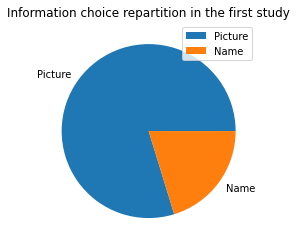

In [161]:
# We check the repartition of information choice
# We get the values
val1, counts1 = np.unique(study1res["information_choice"].tolist(), return_counts=True)
val1 = [convertIndexChoice[i] for i in val1]

# We plot the values
plt.title("Information choice repartition in the first study")
plt.pie(counts1, labels=val1)
plt.legend()
plt.savefig('bin/information_repartition_study1.png')
plt.show()

### Second study analysis

In [141]:
# We read the results of the second study
study2res = readResultsStudy(True)
study2res.head()

,recipe_A_id,recipe_B_id,recipe_choice,information_choice,expected_answer
0,17195,15671,1,2,1
1,11726,11889,1,2,1
2,21487,21304,2,3,1
3,10270,10095,1,3,2
4,12532,13802,2,3,2


Text(0.5, 1.0, 'Information choice repartition in the first study')

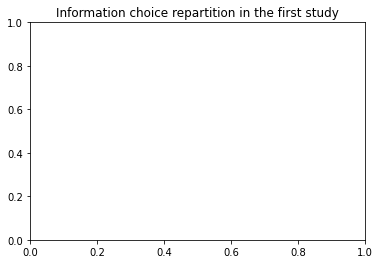

In [155]:
# We check the repartition of information choice
# We get the values
val2, counts2 = np.unique(study2res["information_choice"].tolist(), return_counts=True)
val2 = [convertIndexChoice[i] for i in val2]

# We plot the values
plt.title("Information choice repartition in the first study")
plt.pie(counts2, labels=val2)
plt.legend()
plt.savefig('bin/information_repartition_study2.png')
plt.show()

## More stuff

In [57]:
# Exclude string columns
dfNoStr = df.select_dtypes(exclude=['object'])
dfNoStr.head(5)

,id,servings,calories,reviews,rating,carbohydrates,dietary fiber,sugars,fat,saturated fat,cholesterol,calcium,iron,magnesium,potassium,sodium,FSA_score,number_ingredients
0,10000,12,599.7,38,3.8,86.6,2.6,54.1,26.9,11.6,0.0640,0.1253,0.0025,0.0392,0.1812,0.4130,11,15
1,10001,12,357.6,13,4.3,35.5,2.0,17.2,22.6,10.8,0.1027,0.0968,0.0021,0.0296,0.1525,0.1965,9,9
2,10002,30,200.0,6,3.9,21.9,0.7,14.6,11.6,2.7,0.0124,0.0135,0.0007,0.0162,0.0799,0.1273,8,9
3,10003,24,116.3,154,4.0,10.9,0.2,2.5,7.8,4.9,0.0203,0.0035,0.0004,0.0020,0.0108,0.0549,6,5
4,10004,8,108.1,19,4.7,26.0,0.0,25.2,0.0,0.0,0.0000,0.0011,0.0000,0.0015,0.0213,0.0213,6,6


In [58]:
cosSimCalc(df, 10000, 10001)

0.9974740985767082

In [59]:
cosSimCalc(df, 10000, 10001, mode=2)

0.7028611945202856